# **Final Code used cars regression** 

### **Loading libraries**

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


### **Let us load the data**

In [ ]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# View last 5 rows Hint: Use tail() method
data.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: **
- These are used cars and their data
- Location should be important
- The prices are on indian rupees so it will be important in order to convert
- There are missing values on the last two columns
. Transmision can be seen as a binary variable in order to have better analysis
. Kilometers driven should be one of the most important variable
- Owner type can be transformed to a numeric variable
- It is needed to make an summary of the numerical variables in order to have a better analysis.

### **Let us check the data types and and missing values of each column** 

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: **
- Most of the values are integers or floats
- We can convert seats from float to int since seat only can take integers values
- There are a lot of missing values in price columns, these values should not be taken into account for building the model
- Mileage values can be drop since it is only missing two values
- Engine an Seats can be substitute with mean or mode
- Power can be substitue with mode

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [ ]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(labels='S.No.', axis=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
num_cols=['Year','Mileage','Engine','Power','Seats','New_price','Price','Kilometers_Driven']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00


#### **Observations and Insights: **
- Years go from 1996 to 2019
- Mean is 2013 in years variable
- There is a low variability in years
- Most cars (75%) are after 2011
-Variable years is the only with no null values
- Mileage variability is low and it goes from 0 (need to check) to 33.54 
- Mean of cars is 18.14
- Half of cars are low/high of the mean
- Engine of cars variates too much
- Mean is 1616.5734
- Min is 72 and max is 5998
- Power is medium in variability
- Mean is 112.76
- Min is 34.20 and High 616
- Seats are a discrete variable since it can only take integer values
- Mean is 5 seats
- Half of the cars have 5 seats and 25% have less than 5 and 25% have more than 5
- New Price variable have the most missing values
- It have a medium variability with a minimum of 3.91 and a maximum of 375
- Price have missing values but not as much as New Price
- Its variability is lower than New Price with a minimum of 0.44 and maximum of 160
- 75% of the prices are 9.95 or less
- Kilometer driven have the highest variability with a minimum of 34k and a maximum of 6500k

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.describe(include=['object'] ).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts(normalize=True))
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD               0.007583
Maruti Swift VDI                     0.006756
Maruti Swift Dzire VDI               0.005791
Honda City 1.5 S MT                  0.005377
Maruti Swift VDI BSIV                0.005101
                                       ...   
Skoda Rapid 1.6 MPI Ambition Plus    0.000138
Maruti Alto 800 LXI Airbag           0.000138
BMW 6 Series 630i Coupe              0.000138
Mahindra XUV500 W10 1.99 mHawk       0.000138
Renault KWID 1.0 RXL                 0.000138
Name: Name, Length: 2041, dtype: float64
--------------------------------------------------
For column: Location
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
--------------------------------------------------
For column: Fuel_Type
Diesel 

#### **Observations and Insights: **
- Name variable have the most unique value and the most repeated is 0.7%
- There are only 11 location in our data sets being Mumbai the more repeated
- There are 5 fuel types being diesel the more repeated
- The are only 2 transmisions most of them 71% are manual
- There four owners most of cars only had 1 owner before

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [ ]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by=['Kilometers_Driven'],ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: **
- Most cars are in a range of values except the maximum which have a more high value, it must be an error


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data=data.drop(labels=2328, axis=0)


In [ ]:
data.sort_values(by=['Kilometers_Driven'],ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00
6919,6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN


**Check Mileage extreme values**

In [ ]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by=['Mileage'],ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

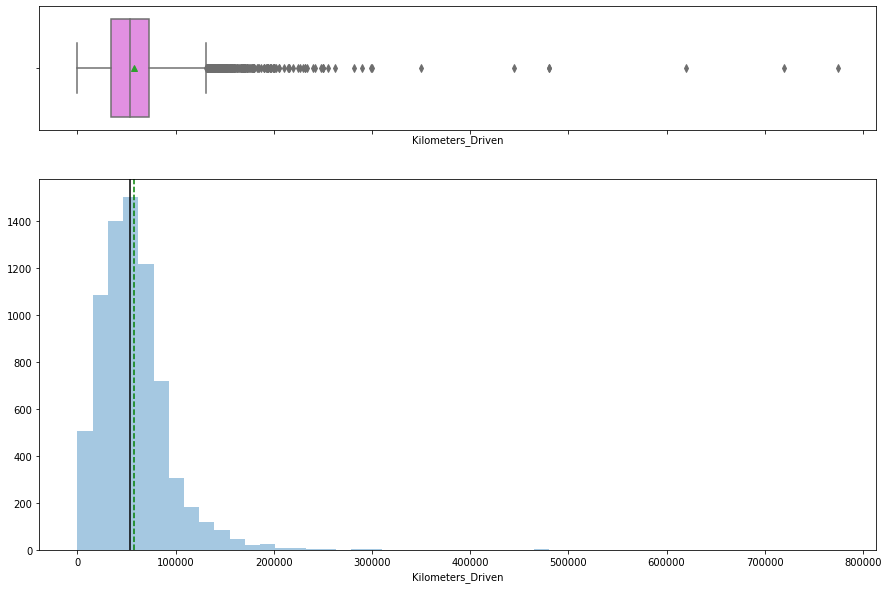

In [ ]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

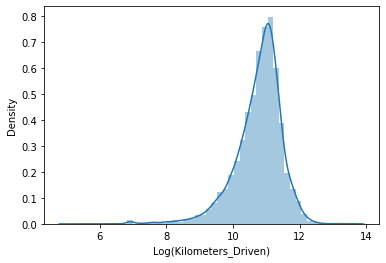

In [ ]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: **
- There are a lot of high outliers in the boxplot
- The variable is right skew with most values between 0 and 100000
- The log transformation gave us a more cenrtralized variable
- It is more similar to a normal distribution


In [ ]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

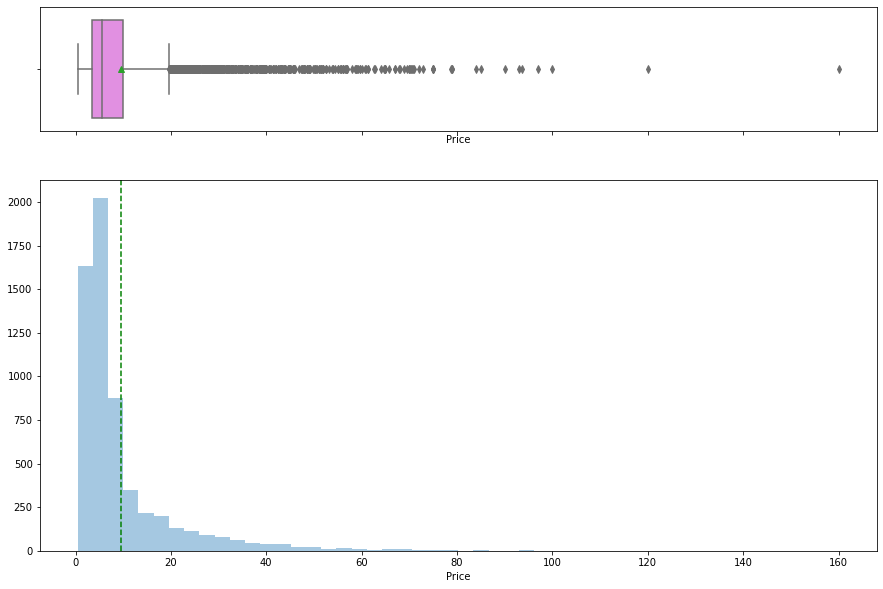

In [ ]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

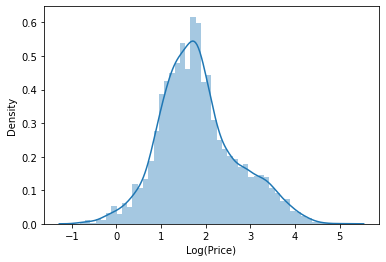

In [ ]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [ ]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: **
- The price variable was highly skew with a lot of high outliers
- Most value were between 0 and 10
- With log we created a normal distribution with values between -1 to 5


## **2. Univariate analysis - Categorical Data**

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

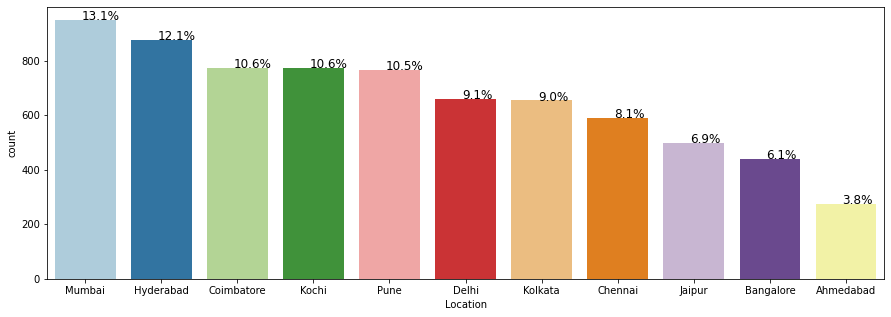

In [ ]:
#Bar Plot for 'Location'
perc_on_bar('Location')

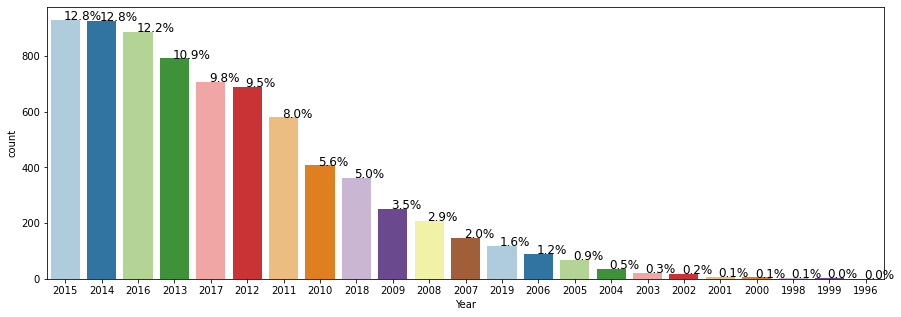

In [ ]:
perc_on_bar('Year')

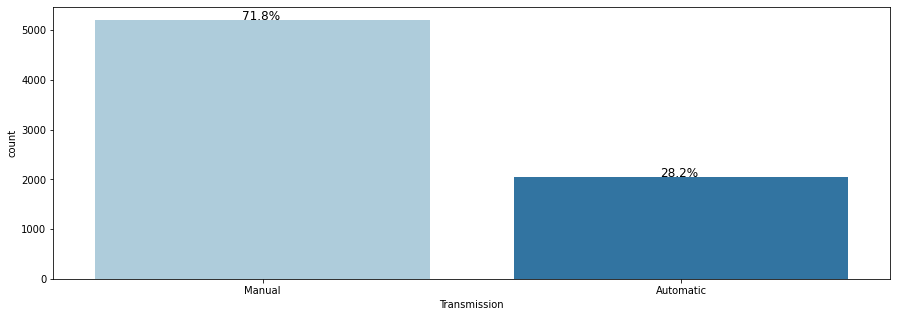

In [ ]:
perc_on_bar('Transmission')

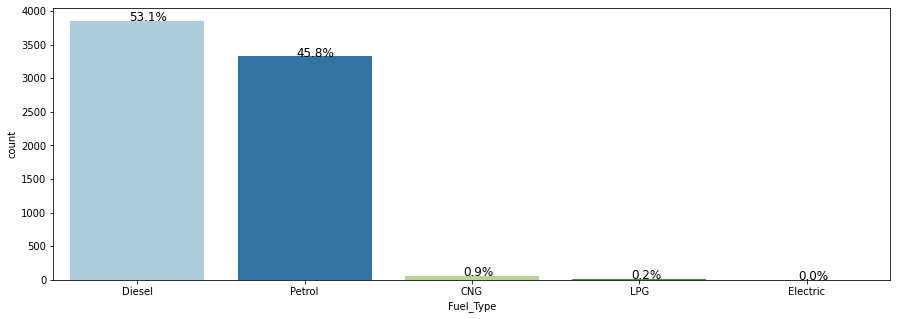

In [ ]:
perc_on_bar('Fuel_Type')

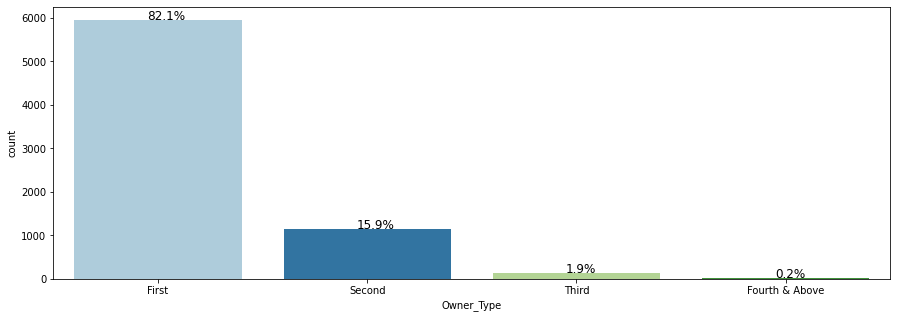

In [ ]:
perc_on_bar('Owner_Type')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

#### **Observations and Insights from all plots: **
- More cars are form Mumbai (13.1%) and Hyderabad (12.1%)
- Less cars are from Ahmedabad (3.8%)
- Delhi is in the middle with 9.1%
- These are all cities from India
- Most of cars only had 1 owner and less more than 4
- Diesel is the most common fuel type followed by petrol
- Most of cars (71%) had manual transmission
- Most of the cars were newer since most of them were from 2013 or newer until 2015


## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

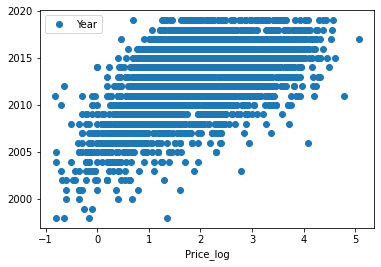

In [ ]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='Price_log', y='Year', style='o')

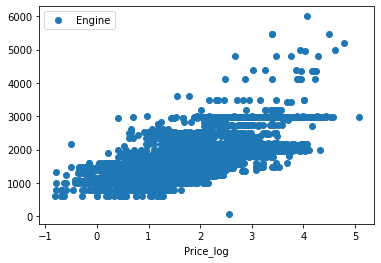

In [ ]:
data.plot(x='Price_log', y='Engine', style='o')

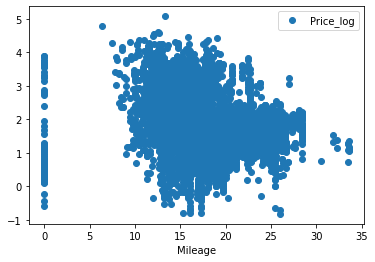

In [ ]:
data.plot(y='Price_log', x='Mileage', style='o')

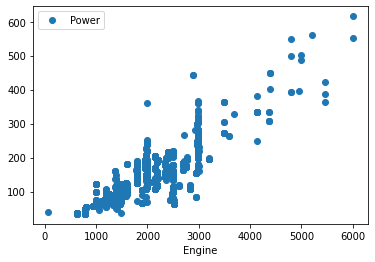

In [ ]:
data.plot(x='Engine', y='Power', style='o')

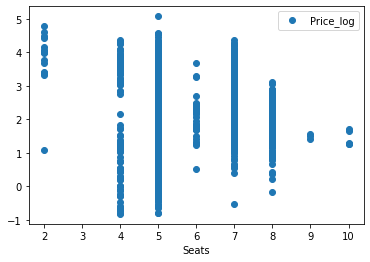

In [ ]:
data.plot(y='Price_log', x='Seats', style='o')

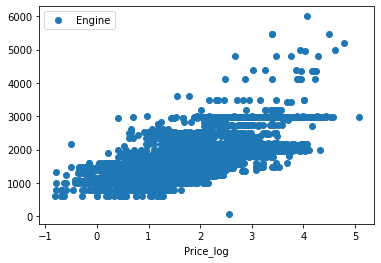

In [ ]:
data.plot(x='Price_log', y='Engine', style='o')

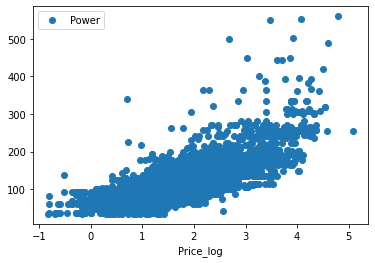

In [ ]:
data.plot(x='Price_log', y='Power', style='o')

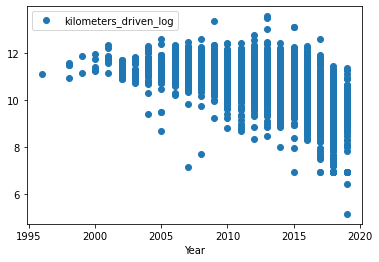

In [ ]:
data.plot(x='Year', y='kilometers_driven_log', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

#### **Observations and Insights from all plots: **
- Price and year have a positive not so strong correlation
- Engine and Price have a more strong correlation, that means that when a car have a bettew engine it will be expensive
- Price and mileage does not have any correlarion at all
- Price and seats also 
- Years and kilometers_driven have a negative correlation since a newer car will have less kilimeters
- Price and power will have a positive correlatione like the one with engine and power



### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

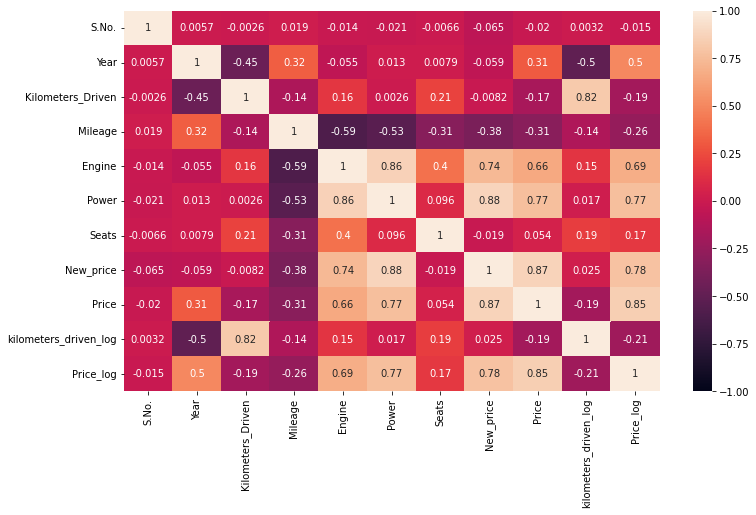

In [ ]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(["Name","Location","Fuel_Type","Transmission","Owner_Type"],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: **
- New Price and Price have a positive correlation with power and engine 
- Power and engine are correlated since a better engine will means that the car will have more power
- Year and kilometers driven have a medium negative correlation, this could happens because not always an old car is driven too much
- Mileage and year have a 0.32 positive correlation
- New Price and Power have a high positive correlation
- It is clear that Engine, Power and Year have more influence on the price


### **3. Box plot**

In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

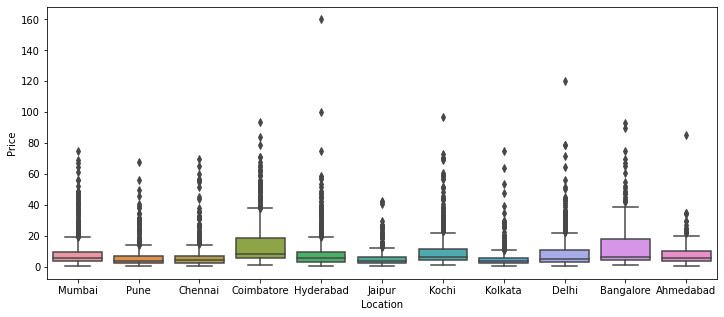

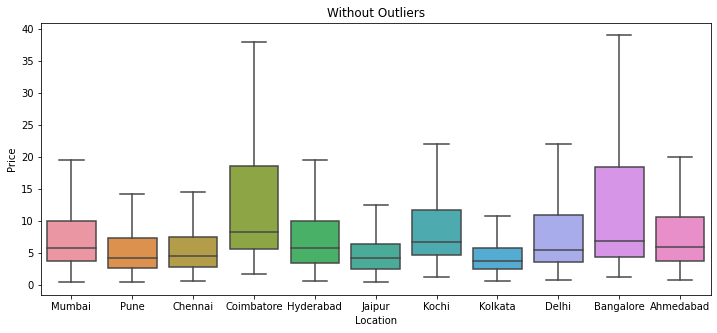

In [ ]:
#Box Plot:Price vs Location
boxplot(data['Location'])

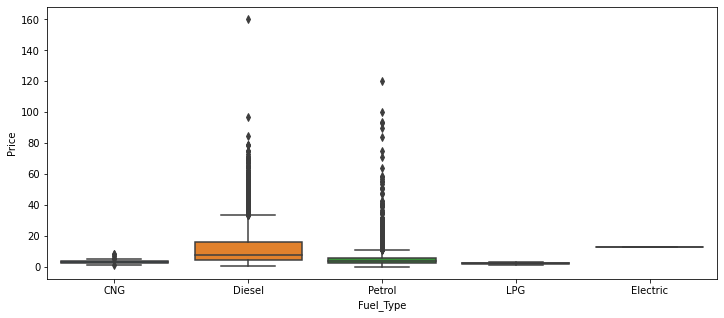

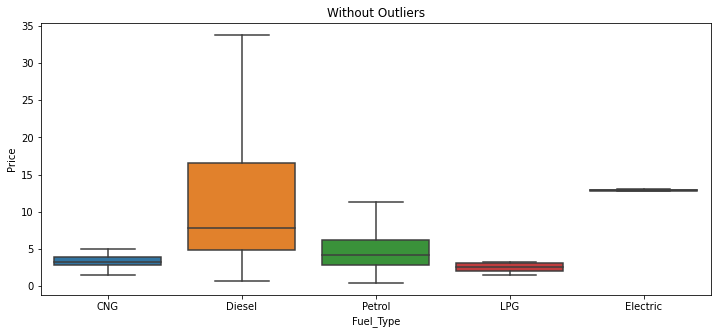

In [ ]:
boxplot(data['Fuel_Type'])

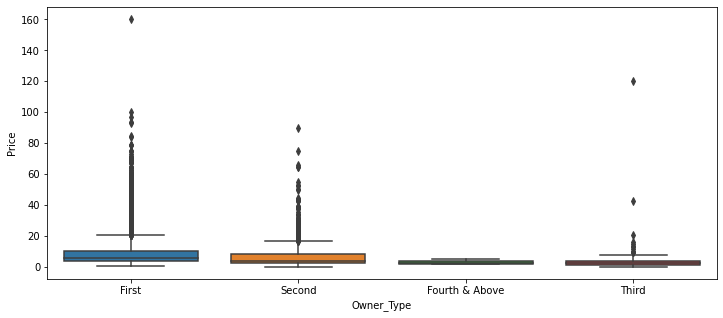

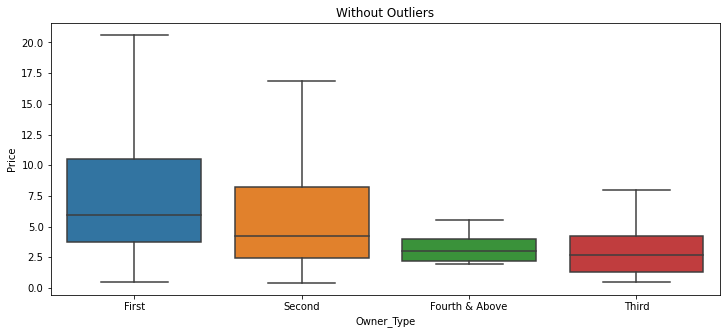

In [ ]:
boxplot(data['Owner_Type'])

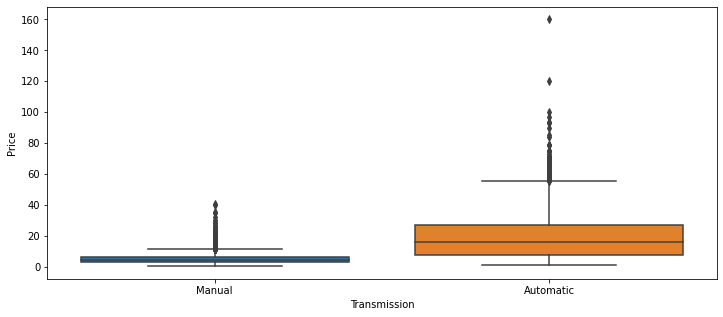

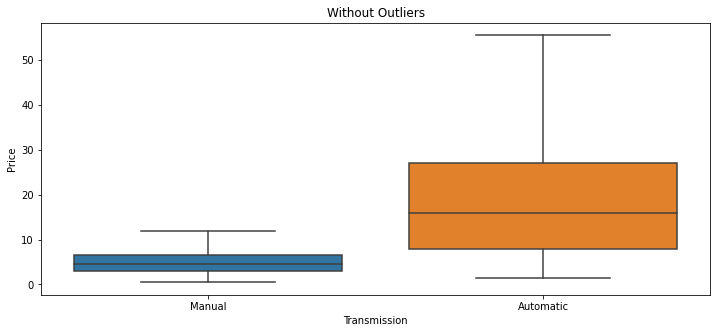

In [ ]:
boxplot(data['Transmission'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots**
- Automatic transmission cars tend to be more expensive than Normal Transmission cars.
- Cars with only one previous owner are expensive, the more previous owners the cheaper the car will be
- Diesel cars are more expensive
- Combaitore and Bangalore are the more expensive cities contrary to Kolkata or Jaipur


## **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
brands=[]
for word in data['Name']:
  brands.append(word.split()[0])

data["Brands"]=brands
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brands
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,Volkswagen


In [ ]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele
        str1 += ' '  
    
    # return string  
    return str1

In [ ]:
model=[]
for word in data['Name']:
  
  model.append(listToString(word.split()[1:]))

data["Model"]=model
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brands,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,Volkswagen,Vento Diesel Trendline
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,Volkswagen,Polo GT TSI
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,Nissan,Micra Diesel XV
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,Volkswagen,Polo GT TSI


In [ ]:
data=data.drop(columns=['Name'])
data

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brands,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,Volkswagen,Vento Diesel Trendline
7249,7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,Volkswagen,Polo GT TSI
7250,7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,Nissan,Micra Diesel XV
7251,7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,Volkswagen,Polo GT TSI


In [ ]:
print(data['Brands'].value_counts(normalize=True))

Maruti           0.199117
Hyundai          0.184777
Honda            0.102454
Toyota           0.069912
Mercedes-Benz    0.052399
Volkswagen       0.051572
Ford             0.048400
Mahindra         0.045643
BMW              0.042885
Audi             0.039300
Tata             0.031440
Skoda            0.027854
Renault          0.023442
Chevrolet        0.020822
Nissan           0.016133
Land             0.009239
Jaguar           0.006619
Fiat             0.005240
Mitsubishi       0.004964
Mini             0.004275
Volvo            0.003861
Jeep             0.002620
Porsche          0.002620
Datsun           0.002344
ISUZU            0.000414
Force            0.000414
Isuzu            0.000276
Bentley          0.000276
Ambassador       0.000138
Smart            0.000138
OpelCorsa        0.000138
Lamborghini      0.000138
Hindustan        0.000138
Name: Brands, dtype: float64


In [ ]:
print(data['Model'].value_counts(normalize=True))

XUV500 W8 2WD                        0.007584
Swift VDI                            0.006757
Swift Dzire VDI                      0.005792
City 1.5 S MT                        0.005378
Swift VDI BSIV                       0.005102
                                       ...   
Montero 3.2 GLS                      0.000138
i20 Diesel Asta Option               0.000138
Figo Diesel                          0.000138
KUV 100 mFALCON D75 K8 Dual Tone     0.000138
Pajero 2.8 SFX 7Str                  0.000138
Name: Model, Length: 2041, dtype: float64


#### **Observations and Insights: **
- Of the name we could extract Brand and Model
- We create two columns one with the brand and one with the model and drop the name one
- We have a decent value of brands but too much model values
- We can use the brands to predict

### **Missing value treatment**

In [ ]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brands                      0
Model                       0
dtype: int64

#### **Observations and Insights: **
- There are 7 columns with missing values
- Mileage only have 2, Seats 53 and Engine 46
- New Price have the most
- Price and Price_log have the same mising value since one is the logarithm of the other data
- Power have 175 missing values

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'
seats=[]
seats=(np.where(data['Seats'].isnull() == True)[0])
seats

array([ 194,  208,  229,  733,  749, 1294, 1327, 1385, 1460, 1917, 2074,
       2096, 2264, 2325, 2334, 2368, 2529, 2541, 2622, 2667, 2736, 2779,
       2841, 3271, 3403, 3519, 3521, 3799, 3809, 3881, 4010, 4151, 4228,
       4576, 4603, 4696, 4711, 4951, 5014, 5184, 5269, 5892, 6041, 6540,
       6543, 6632, 6642, 6650, 6676, 6684, 6879, 6901, 6956])

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

In [ ]:
misbrands=[]
for i in seats:
  misbrands.append(data['Model'].iloc[i])
misbrands=set(misbrands)
misbrands



{'5 Series 520d Sedan ',
 'CR-V AT With Sun Roof ',
 'City 1.3 DX ',
 'City 1.5 EXI ',
 'City 1.5 GXI ',
 'Endeavour Hurricane LE ',
 'Estilo LXI ',
 'Etios Liva Diesel TRD Sportivo ',
 'Etios Liva V ',
 'Figo Diesel ',
 'Jazz 2020 Petrol ',
 'Jazz Select Edition ',
 'Laura 1.8 TSI Ambition ',
 'Punto 1.2 Dynamic ',
 'Punto 1.3 Emotion ',
 'Punto 1.4 Emotion ',
 'Rover Range Rover 3.0 D ',
 'Rover Range Rover Sport 2005 2012 Sport ',
 'Santro GLS II - Euro II ',
 'Santro LP zipPlus ',
 'Santro Xing XG ',
 'Swift 1.3 LXI ',
 'Swift 1.3 VXI ABS ',
 'Swift 1.3 VXi ',
 'Swift 1.3 ZXI ',
 'TUV 300 P4 ',
 'Wagon R Vx ',
 'i20 new Sportz AT 1.4 '}

In [ ]:
misbrands

{'5 Series 520d Sedan ',
 'CR-V AT With Sun Roof ',
 'City 1.3 DX ',
 'City 1.5 EXI ',
 'City 1.5 GXI ',
 'Endeavour Hurricane LE ',
 'Estilo LXI ',
 'Etios Liva Diesel TRD Sportivo ',
 'Etios Liva V ',
 'Figo Diesel ',
 'Jazz 2020 Petrol ',
 'Jazz Select Edition ',
 'Laura 1.8 TSI Ambition ',
 'Punto 1.2 Dynamic ',
 'Punto 1.3 Emotion ',
 'Punto 1.4 Emotion ',
 'Rover Range Rover 3.0 D ',
 'Rover Range Rover Sport 2005 2012 Sport ',
 'Santro GLS II - Euro II ',
 'Santro LP zipPlus ',
 'Santro Xing XG ',
 'Swift 1.3 LXI ',
 'Swift 1.3 VXI ABS ',
 'Swift 1.3 VXi ',
 'Swift 1.3 ZXI ',
 'TUV 300 P4 ',
 'Wagon R Vx ',
 'i20 new Sportz AT 1.4 '}

In [ ]:
dictOfWords={}
for element in misbrands:
  if "Endeavour" in element:
    dictOfWords[element]=7
  if "TUV" in element:
    dictOfWords[element]=9
for i in dictOfWords:
  misbrands.remove(i)
dictOfWords

{'Endeavour Hurricane LE ': 7, 'TUV 300 P4 ': 9}

In [ ]:
for i in misbrands:
   dictOfWords[i]=5



In [ ]:
dictOfWords

{'5 Series 520d Sedan ': 5,
 'CR-V AT With Sun Roof ': 5,
 'City 1.3 DX ': 5,
 'City 1.5 EXI ': 5,
 'City 1.5 GXI ': 5,
 'Endeavour Hurricane LE ': 7,
 'Estilo LXI ': 5,
 'Etios Liva Diesel TRD Sportivo ': 5,
 'Etios Liva V ': 5,
 'Figo Diesel ': 5,
 'Jazz 2020 Petrol ': 5,
 'Jazz Select Edition ': 5,
 'Laura 1.8 TSI Ambition ': 5,
 'Punto 1.2 Dynamic ': 5,
 'Punto 1.3 Emotion ': 5,
 'Punto 1.4 Emotion ': 5,
 'Rover Range Rover 3.0 D ': 5,
 'Rover Range Rover Sport 2005 2012 Sport ': 5,
 'Santro GLS II - Euro II ': 5,
 'Santro LP zipPlus ': 5,
 'Santro Xing XG ': 5,
 'Swift 1.3 LXI ': 5,
 'Swift 1.3 VXI ABS ': 5,
 'Swift 1.3 VXi ': 5,
 'Swift 1.3 ZXI ': 5,
 'TUV 300 P4 ': 9,
 'Wagon R Vx ': 5,
 'i20 new Sportz AT 1.4 ': 5}

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas
x=0
for i in seats:
  data['Seats'].iloc[i]=seats[x]
  x=x+1

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brands                      0
Model                       0
dtype: int64

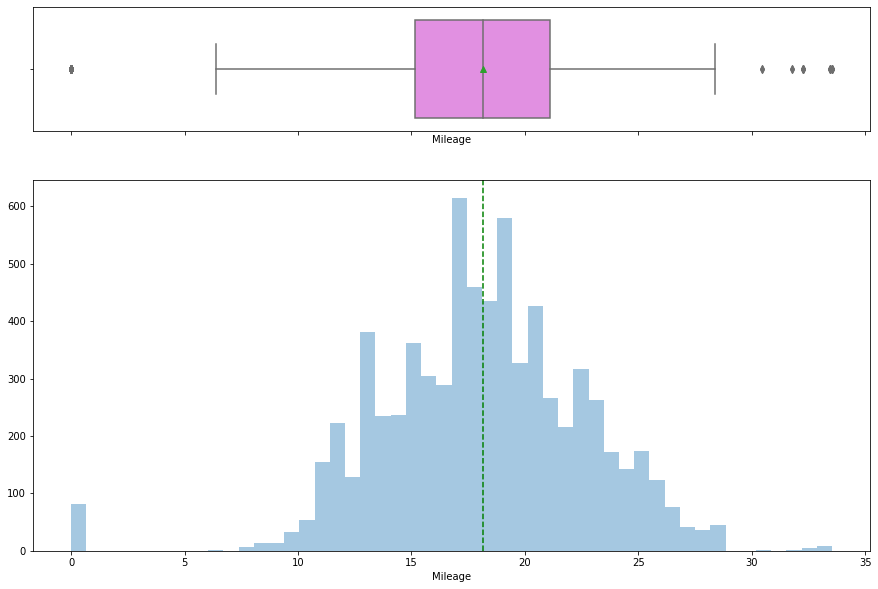

In [ ]:
histogram_boxplot(data['Mileage'])

In [ ]:
mileage=[]
mileage=(np.where(data['Mileage'].isnull() == True)[0])
mileage

array([4445, 4903])

In [ ]:
for i in mileage:
  print(data['Mileage'].iloc[i])

nan
nan


In [ ]:
# Inpute missing Mileage. For example use can use median or any other methods.
for i in mileage:
  data['Mileage'].iloc[i]=data['Mileage'].median()


In [ ]:
# Now check total number of missing values of the mileage column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

0

In [ ]:
#Checking the values
for i in mileage:
  print(data['Mileage'].iloc[i])

18.16
18.16


**Missing values for Engine**

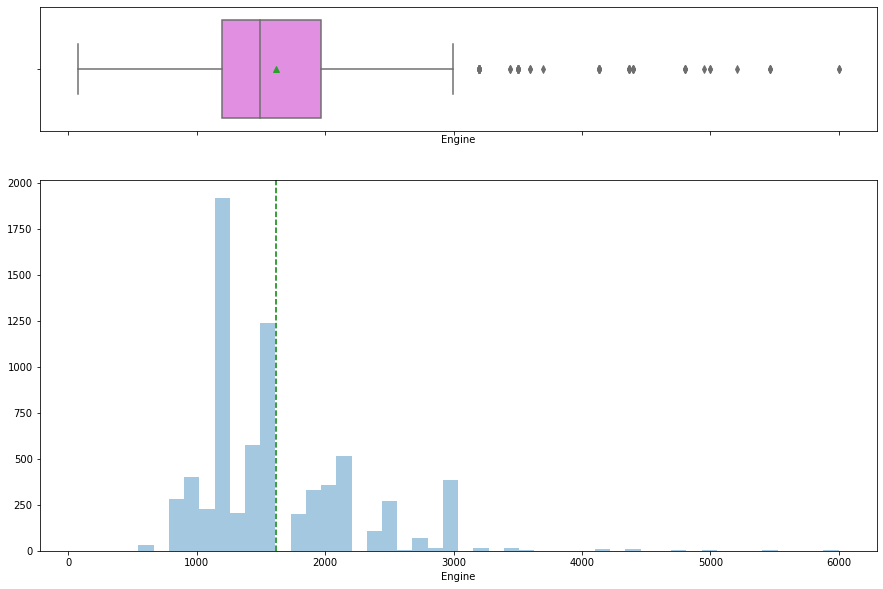

In [ ]:
#Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

In [ ]:
#Missing values from Engine
Engine=[]
Engine=(np.where(data['Engine'].isnull() == True)[0])
Engine

array([ 194,  208,  733,  749, 1294, 1327, 1385, 1460, 2074, 2096, 2264,
       2325, 2334, 2529, 2541, 2622, 2667, 2736, 2779, 2841, 3271, 3403,
       3519, 3521, 3809, 4010, 4151, 4228, 4576, 4603, 4696, 4711, 4951,
       5014, 5184, 5269, 6041, 6540, 6543, 6632, 6642, 6650, 6676, 6684,
       6879, 6901])

In [ ]:
data['Engine']=data['Engine'].fillna(data['Engine'].mode()[0])

In [ ]:
# Now check total number of missing values of the engine column to verify if they are imputed or not. Hint: Use isnull() method
data['Engine'].isnull().sum()

0

In [ ]:
#Checking the values
for i in Engine:
  print(data['Engine'].iloc[i])

1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0
1197.0


**Missing values for Power**

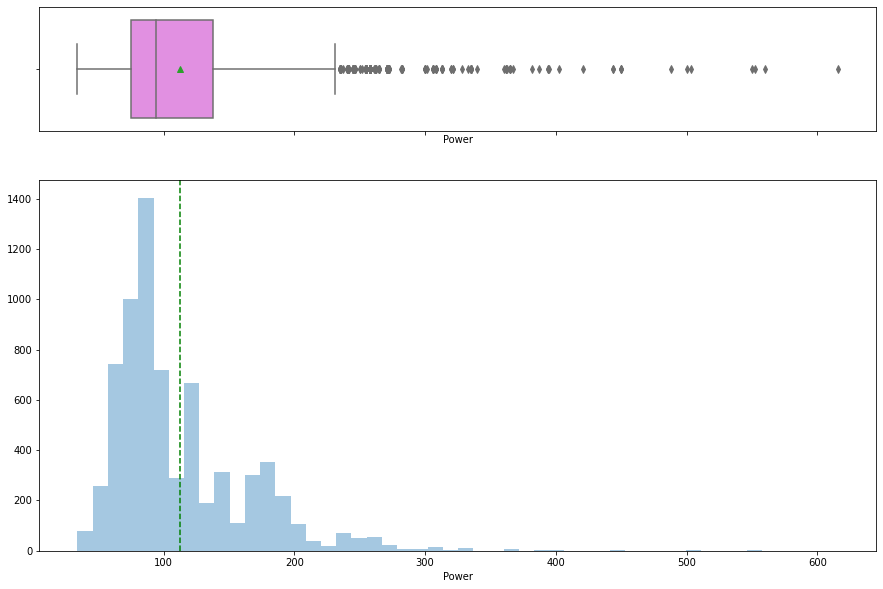

In [ ]:
#Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

In [ ]:
#Missing values from Power
Power=[]
Power=(np.where(data['Power'].isnull() == True)[0])
Power

array([  76,   79,   89,  120,  143,  194,  208,  227,  245,  262,  307,
        308,  386,  424,  428,  443,  472,  575,  631,  647,  648,  733,
        739,  748,  749,  829,  915,  926,  934, 1068, 1143, 1153, 1271,
       1294, 1319, 1327, 1345, 1385, 1388, 1419, 1460, 1555, 1578, 1649,
       1672, 1857, 1999, 2053, 2074, 2096, 2130, 2164, 2262, 2264, 2267,
       2305, 2325, 2334, 2342, 2368, 2392, 2440, 2449, 2496, 2500, 2526,
       2529, 2541, 2578, 2596, 2622, 2634, 2639, 2667, 2736, 2779, 2841,
       2890, 3032, 3060, 3103, 3188, 3246, 3271, 3289, 3403, 3438, 3515,
       3519, 3521, 3532, 3588, 3627, 3637, 3644, 3668, 3732, 3799, 3809,
       3881, 3897, 3929, 3998, 4010, 4076, 4079, 4151, 4228, 4350, 4353,
       4576, 4603, 4628, 4696, 4708, 4711, 4713, 4743, 4829, 4885, 4899,
       4951, 4953, 5014, 5064, 5118, 5184, 5227, 5269, 5425, 5437, 5457,
       5528, 5532, 5646, 5754, 5758, 5860, 5872, 5892, 5924, 5942, 5984,
       6021, 6041, 6092, 6140, 6161, 6209, 6215, 62

In [ ]:
data['Power']=data['Power'].fillna(data['Power'].mode()[0])

In [ ]:
# Now check total number of missing values of the power column to verify if they are imputed or not. Hint: Use isnull() method
data['Power'].isnull().sum()

0

In [ ]:
#Checking the values
for i in Power:
  print(data['Power'].iloc[i])

74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0


**Missing values for New_price**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brands                      0
Model                       0
dtype: int64

In [ ]:
data=data.drop(columns=['New_price'])

In [ ]:
data.head(5)

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Price_log,Brands,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic


In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                       0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brands                      0
Model                       0
dtype: int64

In [ ]:
#changing brandnames
data.loc[data.Brands == 'ISUZU','Brands']='Isuzu'
data.loc[data.Brands=='Mini','Brands']='Mini Cooper'
data.loc[data.Brands=='Land','Brands']='Land Rover'

In [ ]:
#using business knowledge to create class 
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda','Nissan', 'Volkswagen']
High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Porsche',
      'Land Rover',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [ ]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [ ]:
data['Brand_Class'] = data['Brands'].apply(lambda x: classrange(x))

In [ ]:
data['Age'] = 2022-data['Year']

In [ ]:
data.dropna(inplace=True,axis=0)

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                    0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
Price_log                0
Brands                   0
Model                    0
Brand_Class              0
Age                      0
dtype: int64

In [ ]:
data.groupby(data.Brands).size().sort_values(ascending =False)

Brands
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               266
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini Cooper        26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Bentley             1
Smart               1
Ambassador          1
dtype: int64

In [ ]:
data=data.drop(columns=['S.No.','Year'])

In [ ]:
data.head(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Price_log,Brands,Model,Brand_Class,Age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG,Low,12
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option,Low,7
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,Honda,Jazz V,Low,11
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,Maruti,Ertiga VDI,Low,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic,High,9


** Separate into two dataset for luxury and non luxury cars**

In [ ]:
Low=data[data['Brand_Class']=='Low']
Low=Low.drop(columns=['Brand_Class'])
Luxury=data[data['Brand_Class']=='High']
Luxury=Luxury.drop(columns=['Brand_Class'])
Luxury.head(5)


,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Price_log,Brands,Model,Age
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic,9
13,Delhi,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,11.184421,3.295837,Land Rover,Rover Range Rover 2.2L Pure,8
14,Pune,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,17.50,11.350407,2.862201,Land Rover,Rover Freelander 2 TD4 SE,10
19,Bangalore,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,11.270854,3.332205,Mercedes-Benz,New C-Class C 220 CDI BE Avantgare,8
20,Kochi,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,18.55,10.403717,2.920470,BMW,3 Series 320d,8


In [ ]:
Low.groupby(data.Brands).size().sort_values(ascending =False)

Brands
Maruti        1211
Hyundai       1107
Honda          608
Toyota         411
Volkswagen     315
Ford           300
Mahindra       272
Tata           186
Skoda          173
Renault        145
Chevrolet      121
Nissan          91
Fiat            28
Mitsubishi      27
Datsun          13
Isuzu            3
Force            3
Smart            1
dtype: int64

In [ ]:
Luxury.groupby(data.Brands).size().sort_values(ascending =False)

Brands
Mercedes-Benz    318
BMW              266
Audi             236
Land Rover        60
Jaguar            40
Mini Cooper       26
Volvo             21
Porsche           18
Jeep              15
Lamborghini        1
Bentley            1
dtype: int64

## **Training and Test Set**

**Low dataset**

In [ ]:
# Step-1
XLow = Low.drop(['Price','Price_log','Kilometers_Driven','Model','Brands'],axis=1)
yLow = Low[["Price_log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first=True)
XLow = pd.get_dummies(XLow,drop_first=True)

In [ ]:
XLow.head(5)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,26.60,998.0,58.16,5.0,11.184421,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,19.67,1582.0,126.20,5.0,10.621327,7,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,18.20,1199.0,88.70,5.0,10.736397,11,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,20.77,1248.0,88.76,7.0,11.373663,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,21.10,814.0,55.20,5.0,11.225243,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
yLow.head(5)

,Price_log,Price
0,0.559616,1.75
1,2.525729,12.50
2,1.504077,4.50
3,1.791759,6.00
5,0.854415,2.35


In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_trainlow, X_testlow, y_trainlow,y_testlow =train_test_split(XLow, yLow, test_size=0.3, random_state=1)
print("X_train:",X_trainlow.shape)
print("X_test:",X_testlow.shape)
print("y_train:",y_trainlow.shape)
print("y_test:",y_testlow.shape)

X_train: (3510, 24)
X_test: (1505, 24)
y_train: (3510, 2)
y_test: (1505, 2)


**Luxury Dataset**

In [ ]:
# Step-1
XLux = Luxury.drop(['Price','Price_log','Kilometers_Driven','Model','Brands'],axis=1)
yLux = Luxury[["Price_log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first=True)
XLux = pd.get_dummies(XLux,drop_first=True)

In [ ]:
XLux.head(5)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
4,15.20,1968.0,140.80,5.0,10.613246,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13,12.70,2179.0,187.70,5.0,11.184421,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14,0.00,2179.0,115.00,5.0,11.350407,10,0,0,0,0,0,0,0,0,0,1,0,0,1,0
19,14.84,2143.0,167.62,5.0,11.270854,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20,22.69,1995.0,190.00,5.0,10.403717,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
yLux.head(5)

,Price_log,Price
4,2.875822,17.74
13,3.295837,27.00
14,2.862201,17.50
19,3.332205,28.00
20,2.920470,18.55


In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_trainlux, X_testlux, y_trainlux,y_testlux =train_test_split(XLux, yLux, test_size=0.3, random_state=1)
print("X_train:",X_trainlux.shape)
print("X_test:",X_testlux.shape)
print("y_train:",y_trainlux.shape)
print("y_test:",y_testlux.shape)

X_train: (701, 20)
X_test: (301, 20)
y_train: (701, 2)
y_test: (301, 2)


## **Score function**

In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score_low(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_trainlow)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_testlow)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_trainlow['Price'],pred_train_)
    test_r2=metrics.r2_score(y_testlow['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_trainlow['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_testlow['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_trainlow['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_testlow['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_trainlow['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_testlow['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score_lux(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_trainlux)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_testlux)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_trainlux['Price'],pred_train_)
    test_r2=metrics.r2_score(y_testlux['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_trainlux['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_testlux['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_trainlux['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_testlux['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_trainlux['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_testlux['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

## **Linear Regression**

###**Low dataset**

In [ ]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lrlow = LinearRegression()

In [ ]:
# Fit linear regression model
lrlow.fit(X_trainlow,y_trainlow['Price_log']) 

LinearRegression()

In [ ]:
# Get score of the model.
import numpy as np
import sklearn.metrics as metrics
LR_score_low = get_model_score_low(lrlow)

R-square on training set :  0.843940906571258
R-square on test set :  -0.23787542077673884
RMSE on training set :  1.6729988910124154
RMSE on test set :  5.142843435583586


####**Important Features**

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_trainlow = sm.add_constant(X_trainlow)
# Add constant to test data
x_testlow = sm.add_constant(X_testlow)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_trainlow["Price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_trainlow)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     901.3
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:21:03   Log-Likelihood:                -42.250
No. Observations:                3510   AIC:                             132.5
Df Residuals:                    3486   BIC:                             280.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [ ]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Location_Kochi,-0.055924,2.795751e-02
Location_Hyderabad,0.062574,1.170087e-02
Seats,0.000045,2.426375e-03
Owner_Type_Third,-0.103792,1.336923e-03
Location_Coimbatore,0.083181,1.330659e-03
Location_Mumbai,-0.080650,1.142394e-03
Location_Bangalore,0.103557,2.588851e-04
Location_Pune,-0.095276,1.496542e-04
Location_Delhi,-0.099223,1.308223e-04
Fuel_Type_Diesel,0.153549,7.613679e-05


In [ ]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in Low.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'Seats', 'Owner_Type', 'Fuel_Type', 'Transmission', 'kilometers_driven_log', 'Engine', 'Power', 'Age']


### **Luxury Dataset**

In [ ]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lrlux = LinearRegression()

In [ ]:
# Fit linear regression model
lrlux.fit(X_trainlux,y_trainlux['Price_log'])

LinearRegression()

In [ ]:
# Get score of the model.
import numpy as np
import sklearn.metrics as metrics
LR_score_lux = get_model_score_lux(lrlux)

R-square on training set :  0.7093938005250314
R-square on test set :  0.7151758591755784
RMSE on training set :  8.837794449807523
RMSE on test set :  8.568868801187504


#### **Important Features**

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_trainlux = sm.add_constant(X_trainlux)
# Add constant to test data
x_testlux = sm.add_constant(X_testlux)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_trainlux["Price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_trainlux)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     98.62
Date:                Fri, 21 Jan 2022   Prob (F-statistic):          1.37e-185
Time:                        17:21:14   Log-Likelihood:                -107.39
No. Observations:                 701   AIC:                             256.8
Df Residuals:                     680   BIC:                             352.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.98

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [ ]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Location_Kochi,-0.149098,1.797708e-02
Location_Bangalore,0.154252,1.420449e-02
Location_Hyderabad,0.193071,1.583509e-03
Engine,0.000169,2.003543e-05
Mileage,-0.016833,3.390463e-07
Transmission_Manual,-0.316836,1.925372e-07
Fuel_Type_Petrol,-0.192849,1.658340e-07
Seats,0.000244,4.448253e-09
kilometers_driven_log,-0.130901,3.725304e-09
Power,0.002965,1.625678e-14


In [ ]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in Luxury.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'Engine', 'Mileage', 'Transmission', 'Fuel_Type', 'Seats', 'kilometers_driven_log', 'Power', 'Age']


## **Ridge-Lasso Regression**

### **Low dataset**

#### **Ridge Regression**

In [ ]:
# import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create a Ridge regression model
rrlow = Ridge(alpha=0.01)

In [ ]:
# Fit Ridge regression model.
rrlow.fit(X_trainlow, y_trainlow['Price_log'])

Ridge(alpha=0.01)

In [ ]:
# Get score of the model.
RR_score_low = get_model_score_low(rrlow)

R-square on training set :  0.8439410393244549
R-square on test set :  -0.23788187229767943
RMSE on training set :  1.672998179435815
RMSE on test set :  5.142856837222528


#### **Lasso Regression**

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [ ]:
model_lasso_low = Lasso(alpha=0.01)
model_lasso_low.fit(X_trainlow, y_trainlow['Price_log'])

Lasso(alpha=0.01)

In [ ]:
SS_score_low = get_model_score_low(model_lasso_low)

R-square on training set :  0.8386132548915495
R-square on test set :  -0.7435541886587616
RMSE on training set :  1.701316228164312
RMSE on test set :  6.103550723941673


### **Luxury dataset**

#### **Ridge Regression**

In [ ]:
# Create a Ridge regression model
rrlux = Ridge(alpha=0.01)

In [ ]:
# Fit Ridge regression model.
rrlux.fit(X_trainlux, y_trainlux['Price_log'])

Ridge(alpha=0.01)

In [ ]:
# Get score of the model.
RR_score_lux = get_model_score_lux(rrlux)

R-square on training set :  0.7093930804975086
R-square on test set :  0.7151898333380837
RMSE on training set :  8.837805398388996
RMSE on test set :  8.56865859387586


#### **Lasso Regression**

In [ ]:
model_lasso_lux = Lasso(alpha=0.01)
model_lasso_lux.fit(X_trainlux, y_trainlux['Price_log'])

Lasso(alpha=0.01)

In [ ]:
SS_score_lux = get_model_score_lux(model_lasso_lux)

R-square on training set :  0.6838581881328072
R-square on test set :  0.7437032589962019
RMSE on training set :  9.217909247242973
RMSE on test set :  8.12842938673851


In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [ ]:
import eli5
eli5.show_weights(model_lasso_lux, top=-1, feature_names = X_trainlux.columns.tolist())

Weight?,Feature
+4.173,<BIAS>
+0.127,Location_Hyderabad
+0.066,Location_Bangalore
+0.003,Power
+0.000,Seats
+0.000,Engine
-0.012,Mileage
-0.019,Transmission_Manual
-0.065,kilometers_driven_log
-0.072,Location_Kochi


In [ ]:
print (model_lasso_lux.coef_)

[-0.01205059  0.00021245  0.00275999  0.00023571 -0.0652325  -0.14037107
  0.0663692   0.          0.         -0.          0.12695458 -0.
 -0.07172451 -0.         -0.         -0.         -0.10998044 -0.01903121
 -0.         -0.        ]


## **Tuning Lasso Regression for Luxury Cars**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [ ]:
model = Lasso()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define grid
grid = dict()
grid['alpha'] = arange(0.001, 1, 0.001)

In [ ]:
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# perform the search
results = search.fit(X_trainlux, y_trainlux['Price_log'])

In [ ]:
best_grid_lux_lasso = results.best_estimator_

In [ ]:
print(results.best_estimator_)

Lasso(alpha=0.001)


In [ ]:
# Fit the best algorithm to the data. 
best_grid_lux_lasso.fit(X_trainlux, y_trainlux['Price_log'])

Lasso(alpha=0.001)

In [ ]:
# Get score of the model.
Lasso_model_lux = get_model_score_lux(best_grid_lux_lasso)

R-square on training set :  0.7110462039484136
R-square on test set :  0.7224801551509699
RMSE on training set :  8.812632529159819
RMSE on test set :  8.458281160558323


## **Decision Tree**

### **Low dataset**

In [ ]:
# import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regression model
dtreelow = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit decision tree regression model.
dtreelow.fit(X_trainlow, y_trainlow['Price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model.
Dtree_model_low = get_model_score_low(dtreelow)

R-square on training set :  0.9999935790401625
R-square on test set :  0.8538643457835702
RMSE on training set :  0.010731269210488495
RMSE on test set :  1.7670259499532517


In [ ]:
print(pd.DataFrame(dtreelow.feature_importances_, columns = ["Imp"], index = X_trainlow.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.453284
Age                        0.322990
Engine                     0.108976
kilometers_driven_log      0.028292
Mileage                    0.026377
Location_Kolkata           0.011774
Seats                      0.010976
Transmission_Manual        0.004656
Location_Hyderabad         0.004410
Location_Jaipur            0.004080
Location_Coimbatore        0.003791
Owner_Type_Second          0.003323
Location_Delhi             0.002771
Location_Bangalore         0.002493
Location_Mumbai            0.002162
Location_Kochi             0.002068
Location_Pune              0.001721
Fuel_Type_Diesel           0.001675
Location_Chennai           0.001646
Fuel_Type_Petrol           0.001644
Owner_Type_Third           0.000818
Owner_Type_Fourth & Above  0.000073
Fuel_Type_LPG              0.000003
Fuel_Type_Electric         0.000000


### **Luxury Dataset**

In [ ]:
# Create a decision tree regression model
dtreelux = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit decision tree regression model.
dtreelux.fit(X_trainlux, y_trainlux['Price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model.
Dtree_model_lux = get_model_score_lux(dtreelux)

R-square on training set :  0.9999973452839231
R-square on test set :  0.5607010139850975
RMSE on training set :  0.02671163668129805
RMSE on test set :  10.641802527698436


In [ ]:
print(pd.DataFrame(dtreelux.feature_importances_, columns = ["Imp"], index = X_trainlux.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Age                    0.488113
Power                  0.262834
kilometers_driven_log  0.069590
Location_Kochi         0.048584
Engine                 0.029412
Mileage                0.024311
Location_Hyderabad     0.015005
Transmission_Manual    0.014722
Fuel_Type_Petrol       0.007970
Location_Bangalore     0.007419
Location_Delhi         0.006483
Seats                  0.006233
Location_Mumbai        0.005569
Location_Coimbatore    0.004480
Owner_Type_Second      0.003740
Location_Pune          0.002410
Location_Chennai       0.001668
Location_Jaipur        0.000863
Location_Kolkata       0.000594
Owner_Type_Third       0.000000


## **Random Forest**

### **Low Dataset**

In [ ]:
# import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Randomforest regression model 
forestlow = RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Fit Randomforest regression model.
forestlow.fit(X_trainlow, y_trainlow['Price_log'])

RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Get score of the model.
RF_model_low = get_model_score_low(forestlow)

R-square on training set :  0.9828717032289666
R-square on test set :  0.896908018523232
RMSE on training set :  0.5542531917904574
RMSE on test set :  1.4841482246510231


In [ ]:
# Check documentation for all the parametrs that the model takes and play with those
from pprint import pprint
print('Parameters currently in use:\n')
pprint(forestlow.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Print important features similar to decision tree
print(pd.DataFrame(forestlow.feature_importances_, columns = ["Imp"], index = X_trainlow.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.421893
Age                        0.357481
Engine                     0.109752
Mileage                    0.028056
kilometers_driven_log      0.025960
Seats                      0.010381
Location_Kolkata           0.010330
Location_Hyderabad         0.004766
Location_Coimbatore        0.003801
Owner_Type_Second          0.003373
Transmission_Manual        0.003349
Location_Jaipur            0.003170
Fuel_Type_Diesel           0.003150
Location_Bangalore         0.002891
Location_Pune              0.002156
Location_Mumbai            0.002103
Location_Delhi             0.002029
Location_Chennai           0.001608
Location_Kochi             0.001528
Fuel_Type_Petrol           0.001370
Owner_Type_Third           0.000728
Owner_Type_Fourth & Above  0.000100
Fuel_Type_LPG              0.000026
Fuel_Type_Electric         0.000000


### **Luxury Dataset**

In [ ]:
# Create a Randomforest regression model 
forestlux = RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Fit Randomforest regression model.
forestlux.fit(X_trainlux, y_trainlux['Price_log'])

RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Get score of the model.
RF_model_lux = get_model_score_lux(forestlux)

R-square on training set :  0.9343800255798376
R-square on test set :  0.6817467527320655
RMSE on training set :  4.199615089003682
RMSE on test set :  9.057774766396006


In [ ]:
# Print important features similar to decision tree
print(pd.DataFrame(forestlux.feature_importances_, columns = ["Imp"], index = X_trainlux.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Age                    0.496111
Power                  0.228376
Engine                 0.086510
kilometers_driven_log  0.066383
Mileage                0.039732
Seats                  0.012236
Location_Hyderabad     0.011922
Location_Kochi         0.008721
Transmission_Manual    0.008681
Location_Bangalore     0.008595
Location_Delhi         0.007577
Location_Coimbatore    0.005052
Fuel_Type_Petrol       0.004414
Location_Mumbai        0.004345
Owner_Type_Second      0.003372
Location_Chennai       0.002610
Location_Pune          0.001950
Location_Kolkata       0.001435
Owner_Type_Third       0.001215
Location_Jaipur        0.000763


## **Hyperparameter Tuning: Decision Tree**

### **Low Dataset**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV
# Choose the type of estimator. 
dtree_tuned_low =  DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
# Check documentation for all the parametrs that the model takes and play with those.
parameters_low = {'max_depth': range(2, 50),
              'min_samples_split': range(2, 30, 1)}

# Type of scoring used to compare parameter combinations
scorer_low='neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned_low, parameters_low, scoring=scorer_low,cv=10)
grid_obj = grid_obj.fit(X_trainlow, y_trainlow['Price_log'])

# Set the clf to the best combination of parameters
dtree_tuned_low = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned_low.fit(X_trainlow, y_trainlow['Price_log'])

DecisionTreeRegressor(max_depth=20, min_samples_split=19, random_state=1)

In [ ]:
# Get score of the dtree_tuned
print(dtree_tuned_low)

DecisionTreeRegressor(max_depth=20, min_samples_split=19, random_state=1)


In [ ]:
# Get score of the model.
CVDT_model_low = get_model_score_low(dtree_tuned_low)

R-square on training set :  0.9444894682951752
R-square on test set :  0.848940692697198
RMSE on training set :  0.9977892183391895
RMSE on test set :  1.7965469769185107


In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned_low.feature_importances_, columns = ["Imp"], index = X_trainlow.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.473255
Age                        0.336794
Engine                     0.112227
Mileage                    0.019980
kilometers_driven_log      0.013663
Location_Kolkata           0.010867
Seats                      0.009452
Transmission_Manual        0.004204
Location_Hyderabad         0.003450
Location_Coimbatore        0.003161
Location_Bangalore         0.002557
Location_Jaipur            0.002424
Location_Delhi             0.001649
Location_Mumbai            0.001474
Location_Kochi             0.001383
Fuel_Type_Diesel           0.001015
Owner_Type_Second          0.000926
Fuel_Type_Petrol           0.000816
Location_Pune              0.000323
Owner_Type_Third           0.000279
Location_Chennai           0.000101
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000
Owner_Type_Fourth & Above  0.000000


###**Luxury DataSet**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV
# Choose the type of estimator. 
dtree_tuned_lux =  DecisionTreeRegressor(random_state=1)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(dtree_tuned_low.get_params())


Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}


In [ ]:
# Grid of parameters to choose from.
# Check documentation for all the parametrs that the model takes and play with those.
parameters_lux = {'max_depth': range(2, 50),
              'min_samples_split': range(2, 30, 1)}
# Type of scoring used to compare parameter combinations
scorer_lux='neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned_lux, parameters_lux, scoring=scorer_lux,cv=10)
grid_obj = grid_obj.fit(X_trainlux, y_trainlux['Price_log'])

# Set the clf to the best combination of parameters
dtree_tuned_lux = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned_lux.fit(X_trainlux, y_trainlux['Price_log'])

DecisionTreeRegressor(max_depth=8, min_samples_split=15, random_state=1)

In [ ]:
# Get score of the dtree_tuned
print(dtree_tuned_lux)

DecisionTreeRegressor(max_depth=8, min_samples_split=15, random_state=1)


In [ ]:
# Get score of the model.
CVDT_model_lux = get_model_score_lux(dtree_tuned_lux)

R-square on training set :  0.8085125505726536
R-square on test set :  0.5045484886479671
RMSE on training set :  7.1740040300954515
RMSE on test set :  11.301489194366493


In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned_lux.feature_importances_, columns = ["Imp"], index = X_trainlux.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Age                    0.569910
Power                  0.292079
kilometers_driven_log  0.051724
Engine                 0.020642
Transmission_Manual    0.017700
Mileage                0.009490
Fuel_Type_Petrol       0.007320
Location_Delhi         0.006069
Location_Kochi         0.005115
Location_Mumbai        0.003922
Seats                  0.003776
Location_Hyderabad     0.003724
Location_Bangalore     0.003531
Location_Coimbatore    0.002327
Location_Pune          0.001337
Location_Chennai       0.000981
Location_Kolkata       0.000352
Location_Jaipur        0.000000
Owner_Type_Second      0.000000
Owner_Type_Third       0.000000


## **Hyperparameter Tuning: RandomForest**

### **Low Dataset**

In [ ]:
# Choose the type of Regressor. 
rftunlow = RandomForestRegressor(random_state = 1)

In [ ]:
# Check documentation for all the parametrs that the model takes and play with those
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rftunlow.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
param_grid = {
    'bootstrap': [True],
    'max_depth': range(10,14,2),
    'max_features': ["auto", "log2", "sqrt"],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1000]
}

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random_low = GridSearchCV(estimator = rftunlow, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring=scorer_low)

In [ ]:
# Fit the random search model
rf_random_low.fit(X_trainlow, y_trainlow['Price_log'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': range(10, 14, 2),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_grid_low = rf_random_low.best_estimator_

In [ ]:
print(rf_random_low.best_estimator_)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)


In [ ]:
# Fit the best algorithm to the data. 
best_grid_low.fit(X_trainlow, y_trainlow['Price_log'])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)

In [ ]:
# Get score of the model.
CVRF_model_low = get_model_score_low(best_grid_low)

R-square on training set :  0.9769707031799523
R-square on test set :  0.8969699255107562
RMSE on training set :  0.6426750676025162
RMSE on test set :  1.4837025404093043


In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(best_grid_low.feature_importances_, columns = ["Imp"], index = X_trainlow.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.423692
Age                        0.363155
Engine                     0.110418
Mileage                    0.025905
kilometers_driven_log      0.023497
Seats                      0.010254
Location_Kolkata           0.010199
Location_Hyderabad         0.004277
Location_Coimbatore        0.003529
Owner_Type_Second          0.003132
Transmission_Manual        0.003098
Fuel_Type_Diesel           0.003020
Location_Jaipur            0.002959
Location_Bangalore         0.002555
Location_Pune              0.001967
Location_Mumbai            0.001817
Location_Delhi             0.001810
Location_Chennai           0.001325
Fuel_Type_Petrol           0.001322
Location_Kochi             0.001174
Owner_Type_Third           0.000775
Owner_Type_Fourth & Above  0.000096
Fuel_Type_LPG              0.000023
Fuel_Type_Electric         0.000000


### **Luxury Dataset**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
param_grid2 = {
    'bootstrap': [True,False],
    'max_depth': [200],
    'max_features': ["auto", "log2", "sqrt"],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [3000]
}

In [ ]:
# Choose the type of Regressor. 
rftunlux = RandomForestRegressor(random_state = 1)

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random_lux = GridSearchCV(estimator = rftunlux, param_grid = param_grid2, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring=scorer_lux)

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(best_grid_lux.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
X_testlux.head(5)
X_testlux = X_testlux.drop(['Location_Bandalore','Location_Chennai','Location_Coim'],axis=1)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
5673,17.90,2143.0,136.0,5.0,9.678843,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4545,14.16,1968.0,174.3,5.0,10.764118,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1766,11.74,1796.0,186.0,5.0,12.301383,15,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2072,12.40,2698.0,179.5,5.0,10.308953,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2822,18.88,1995.0,184.0,5.0,10.085809,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Fit the random search model
rf_random_lux.fit(X_trainlux, y_trainlux['Price_log'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [200],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [3000]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_grid_lux = rf_random_lux.best_estimator_

In [ ]:
print(rf_random_lux.best_estimator_)

RandomForestRegressor(bootstrap=False, max_depth=200, max_features='log2',
                      n_estimators=3000, random_state=1)


In [ ]:
# Fit the best algorithm to the data. 
best_grid_lux.fit(X_trainlux, y_trainlux['Price_log'])

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='log2',
                      n_estimators=3000, random_state=1)

In [ ]:
# Get score of the model.
CVRF_model_lux = get_model_score_lux(best_grid_lux)

R-square on training set :  0.9999973452839231
R-square on test set :  0.720986572960608
RMSE on training set :  0.026711636681300912
RMSE on test set :  8.48101140196733


In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(best_grid_lux.feature_importances_, columns = ["Imp"], index = X_trainlux.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Age                    0.329470
Power                  0.170536
kilometers_driven_log  0.148441
Engine                 0.107274
Mileage                0.076278
Seats                  0.034484
Fuel_Type_Petrol       0.021264
Owner_Type_Second      0.020673
Location_Coimbatore    0.018016
Location_Kochi         0.011875
Location_Hyderabad     0.010162
Location_Mumbai        0.009819
Location_Delhi         0.007966
Location_Bangalore     0.007852
Transmission_Manual    0.007478
Location_Pune          0.004542
Location_Chennai       0.004455
Location_Kolkata       0.004416
Owner_Type_Third       0.003877
Location_Jaipur        0.001121


## **One model of complete dataset**

### **One Dataset**

In [ ]:
data.head(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Price_log,Brands,Model,Brand_Class,Age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG,Low,12
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option,Low,7
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,Honda,Jazz V,Low,11
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,Maruti,Ertiga VDI,Low,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic,High,9


### **Split data**

In [ ]:
# Step-1
X = data.drop(['Price','Price_log','Kilometers_Driven','Model','Brands'],axis=1)
y = data[["Price_log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X = X.drop(['Brand_Class_High'],axis=1)

In [ ]:
X.head(5)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
0,26.60,998.0,58.16,5.0,11.184421,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,19.67,1582.0,126.20,5.0,10.621327,7,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,18.20,1199.0,88.70,5.0,10.736397,11,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,20.77,1248.0,88.76,7.0,11.373663,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,15.20,1968.0,140.80,5.0,10.613246,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4212, 25)
X_test: (1806, 25)
y_train: (4212, 2)
y_test: (1806, 2)


In [ ]:
X_test.head(5)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
3767,21.43,1364.0,87.2,5.0,11.155078,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3626,20.00,1399.0,68.0,5.0,11.439117,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1683,14.84,2143.0,170.0,5.0,10.393355,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3284,17.30,993.0,60.0,5.0,11.339286,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1
79,0.00,1086.0,74.0,5.0,11.380434,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [ ]:
y_train.head(5)

,Price_log,Price
2116,0.765468,2.15
2769,0.559616,1.75
1518,1.704748,5.50
3783,1.824549,6.20
685,1.266948,3.55


### **Model Score**

In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

### **Decision Tree**

In [ ]:
# Create a decision tree regression model
dtreecom = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit decision tree regression model.
dtreecom.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model.
Dtree_model = get_model_score(dtreecom)

R-square on training set :  0.9999965696959587
R-square on test set :  0.8201198130282102
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.7268421814531925


### **Random Forest**

In [ ]:
# Create a Randomforest regression model 
regr = RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Fit Randomforest regression model.
regr.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
# Get score of the model.
RF_model = get_model_score(regr)

R-square on training set :  0.975757167870242
R-square on test set :  0.8727688344545282
RMSE on training set :  1.7395741494492551
RMSE on test set :  3.97535749731681


### **Hyperparameter Tuning:Random Forest**

In [ ]:
# Choose the type of Regressor. 
rftun = RandomForestRegressor(random_state = 1)

In [ ]:
# Check documentation for all the parametrs that the model takes and play with those
from pprint import pprint
print('Parameters currently in use:\n')
pprint(best_grid.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
param_grid3 = {
    'bootstrap': [True],
    'max_depth': [12],
    'max_features': ["auto"],
    'min_samples_leaf': [1],
    'min_samples_split': range(2,20,2),
    'n_estimators': [1000]
}

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rftun, param_grid = param_grid3, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=scorer)

In [ ]:
# search across 100 different combinations, and use all available cores
# Type of scoring used to compare parameter combinations
scorer='neg_mean_squared_error'


In [ ]:
# Fit the random search model
rf_random.fit(X_train, y_train['Price_log'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [12],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_grid = rf_random.best_estimator_

In [ ]:
print(rf_random.best_estimator_)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)


In [ ]:
# Fit the best algorithm to the data. 
best_grid.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)

In [ ]:
# Get score of the model.
CVRF_model = get_model_score(best_grid)

R-square on training set :  0.9715943298965585
R-square on test set :  0.8750516327524976
RMSE on training set :  1.8830150350237571
RMSE on test set :  3.939532884097948


##  **Testing**

### **Split testsets**

In [ ]:
data.head(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Price_log,Brands,Model,Brand_Class,Age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG,Low,12
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option,Low,7
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,Honda,Jazz V,Low,11
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,Maruti,Ertiga VDI,Low,10
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic,High,9


In [ ]:
xttest = data.drop(['Price','Price_log','Kilometers_Driven','Model','Brands'],axis=1)
yttest = data[["Price_log", "Price",'Brand_Class']]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first=True)
xttest = pd.get_dummies(xttest,drop_first=True)
yttest = pd.get_dummies(yttest,drop_first=True)

In [ ]:
xttest = xttest.drop(['Brand_Class_High'],axis=1)
yttest = yttest.drop(['Brand_Class_High'],axis=1)

In [ ]:
xttest.head(5)

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
0,26.60,998.0,58.16,5.0,11.184421,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,19.67,1582.0,126.20,5.0,10.621327,7,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,18.20,1199.0,88.70,5.0,10.736397,11,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,20.77,1248.0,88.76,7.0,11.373663,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,15.20,1968.0,140.80,5.0,10.613246,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
yttest.head(5)

,Price_log,Price,Brand_Class_Low
0,0.559616,1.75,1
1,2.525729,12.50,1
2,1.504077,4.50,1
3,1.791759,6.00,1
4,2.875822,17.74,0


In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1,y_test1 =train_test_split(xttest, yttest, test_size=0.3, random_state=1)
print("X_train:",X_train1.shape)
print("X_test:",X_test1.shape)
print("y_train:",y_train1.shape)
print("y_test:",y_test1.shape)

X_train: (4212, 25)
X_test: (1806, 25)
y_train: (4212, 3)
y_test: (1806, 3)


In [ ]:
y_test1

,Price_log,Price,Brand_Class_Low
3767,2.243896,9.43,1
3626,1.269761,3.56,1
1683,3.549043,34.78,0
3284,0.223144,1.25,1
79,0.262364,1.30,1
...,...,...,...
1697,1.178655,3.25,1
188,1.526056,4.60,1
2499,2.350422,10.49,0
3887,2.970414,19.50,0


### **Low values**

In [ ]:
y_test1=y_test1[y_test1['Brand_Class_Low']==1]
y_test1


,Price_log,Price,Brand_Class_Low
3767,2.243896,9.43,1
3626,1.269761,3.56,1
3284,0.223144,1.25,1
79,0.262364,1.30,1
4480,1.791759,6.00,1
...,...,...,...
1253,0.693147,2.00,1
1041,1.519513,4.57,1
1697,1.178655,3.25,1
188,1.526056,4.60,1


In [ ]:
X_test1=X_test1[X_test1['Brand_Class_Low']==1]
X_test1

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
3767,21.43,1364.0,87.20,5.0,11.155078,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3626,20.00,1399.0,68.00,5.0,11.439117,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3284,17.30,993.0,60.00,5.0,11.339286,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1
79,0.00,1086.0,74.00,5.0,11.380434,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4480,24.40,1120.0,71.00,5.0,11.082143,8,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,16.36,1495.0,93.70,5.0,10.865230,12,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
1041,18.60,1197.0,85.80,5.0,11.020431,9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1697,19.40,1198.0,86.80,5.0,11.052587,9,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
188,22.32,1582.0,126.32,5.0,11.034890,10,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


####**Score Model**

In [ ]:
def get_model_score1(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train1)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test1)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train1['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test1['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train1['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test1['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train1['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test1['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train1['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test1['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

####**Results**

In [ ]:
# Get score of the model.
CVRF_model2 = get_model_score1(best_grid)

R-square on training set :  0.9715943298965585
R-square on test set :  0.9166235947008804
RMSE on training set :  1.8830150350237571
RMSE on test set :  1.2867387024204142


###**High values**

In [ ]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2,y_test2 =train_test_split(xttest, yttest, test_size=0.3, random_state=1)
print("X_train:",X_train2.shape)
print("X_test:",X_test2.shape)
print("y_train:",y_train2.shape)
print("y_test:",y_test2.shape)

X_train: (4212, 25)
X_test: (1806, 25)
y_train: (4212, 3)
y_test: (1806, 3)


In [ ]:
y_test2=y_test2[y_test2['Brand_Class_Low']==0]
y_test2

,Price_log,Price,Brand_Class_Low
1683,3.549043,34.78,0
3492,2.917771,18.50,0
1764,3.637586,38.00,0
2528,3.604138,36.75,0
4988,3.871201,48.00,0
...,...,...,...
306,3.008648,20.26,0
1548,3.400530,29.98,0
4790,3.583519,36.00,0
2499,2.350422,10.49,0


In [ ]:
X_test2=X_test2[X_test2['Brand_Class_Low']==0]
X_test2

,Mileage,Engine,Power,Seats,kilometers_driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
1683,14.84,2143.0,170.0,5.0,10.393355,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3492,16.55,1968.0,140.0,5.0,11.211847,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1764,0.00,2987.0,165.0,5.0,11.141862,7,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2528,18.00,2993.0,255.0,7.0,10.985293,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4988,18.59,2993.0,265.0,5.0,10.203592,6,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,17.90,2143.0,136.0,5.0,10.778956,7,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1548,14.21,2143.0,203.0,5.0,10.564370,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4790,14.49,2993.0,258.0,5.0,10.878047,13,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2499,12.05,1995.0,154.0,5.0,10.996417,12,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### **Score**

In [ ]:
def get_model_score2(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list2=[] 
    
    pred_train2 = model.predict(X_train2)
    pred_train_2 = np.exp(pred_train2)
    pred_test2 = model.predict(X_test2)
    pred_test_2 = np.exp(pred_test2)
    
    train_r22=metrics.r2_score(y_train2['Price'],pred_train_2)
    test_r22=metrics.r2_score(y_test2['Price'],pred_test_2)
    train_rmse2=metrics.mean_squared_error(y_train2['Price'],pred_train_2,squared=False)
    test_rmse2=metrics.mean_squared_error(y_test2['Price'],pred_test_2,squared=False)
    
    #Adding all scores in the list
    score_list2.extend((train_r22,test_r22,train_rmse2,test_rmse2))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train2['Price'],pred_train_2))
        print("R-square on test set : ",metrics.r2_score(y_test2['Price'],pred_test_2))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train2['Price'],pred_train_2)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test2['Price'],pred_test_2)))
    
    # returning the list with train and test scores
    return score_list2

####**Results**

In [ ]:
# Get score of the model.
CVRF_model3 = get_model_score2(best_grid)

R-square on training set :  0.9715943298965585
R-square on test set :  0.6696035547615276
RMSE on training set :  1.8830150350237571
RMSE on test set :  9.050315864890788


## **Final Models**

### **Low Cars**

###**Model Used**

In [ ]:
# Fit the best algorithm to the data. 
best_grid.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)

####**On complete dataset**

In [ ]:
# Get score of the model.
CVRF_model = get_model_score(best_grid)

R-square on training set :  0.9715943298965585
R-square on test set :  0.8750516327524976
RMSE on training set :  1.8830150350237571
RMSE on test set :  3.939532884097948


####**On low dataset**

In [ ]:
# Get score of the model.
CVRF_model2 = get_model_score1(best_grid)

R-square on training set :  0.9715943298965585
R-square on test set :  0.9166235947008804
RMSE on training set :  1.8830150350237571
RMSE on test set :  1.2867387024204142


###**Predict Low Values**

In [ ]:
pred_test = best_grid.predict(X_test1)
pred_test_ = np.exp(pred_test)

In [ ]:
print("R-square on test set : ",metrics.r2_score(y_test1['Price'],pred_test_))
print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test1['Price'],pred_test_)))  

R-square on test set :  0.9166235947008804
RMSE on test set :  1.2867387024204142


###**Predicted Low value dataset**

In [ ]:
yy3=pred_test_
yy3= np.array(yy3)
len(yy3)

1494

In [ ]:
yy4=y_test1['Price'].values
yy4= np.array(yy4)
len(yy4)

1494

In [ ]:
df = pd.DataFrame({'actual':yy4, 'predicted':yy3})
df

,actual,predicted
0,9.43,7.280238
1,3.56,4.002657
2,1.25,1.009597
3,1.30,0.995749
4,6.00,4.171510
...,...,...
1489,2.00,2.135525
1490,4.57,4.433848
1491,3.25,3.648197
1492,4.60,5.351087


In [ ]:
df['Diferencia']=((df['actual']-df['predicted'])/df['actual'])*100
df

,actual,predicted,Diferencia
0,9.43,7.280238,22.797049
1,3.56,4.002657,-12.434194
2,1.25,1.009597,19.232231
3,1.30,0.995749,23.403899
4,6.00,4.171510,30.474827
...,...,...,...
1489,2.00,2.135525,-6.776237
1490,4.57,4.433848,2.979245
1491,3.25,3.648197,-12.252208
1492,4.60,5.351087,-16.327974


In [ ]:
lista3=[]
lista4=[]
for i in df['Diferencia']:
  if(i<0):
    lista3.append(i)
  else:
    lista4.append(i)

In [ ]:
for i in  range(0,len(lista3)):
  lista3[i]=abs(lista3[i])
lista3

[12.4341944159554,
 13.982698390213086,
 2.1673289480324276,
 6.277884206264214,
 23.505894049801864,
 16.497927364448056,
 5.7502121475489325,
 27.500061195284314,
 2.2066000540664454,
 5.570246357029048,
 9.890760845209822,
 29.461020391709937,
 6.843672759179309,
 0.9265305966262405,
 2.465327260379964,
 12.127797092179222,
 23.033350123096003,
 24.845294834503047,
 10.581407856654357,
 5.92524435780477,
 7.105802721622487,
 40.625863475533166,
 31.335935879343403,
 5.297640460567401,
 1.788599377289074,
 4.544955129801558,
 6.311946421934294,
 1.7380112999675648,
 19.557770655235128,
 30.325776009975492,
 1.0795576080021183,
 11.933942432239512,
 5.996629854518167,
 9.55686974652194,
 17.416140704084295,
 27.434519650918777,
 24.92946483181354,
 16.695505984247188,
 20.223686311594875,
 21.40160737315479,
 44.644004248650084,
 16.317463905629705,
 12.42043954713316,
 23.295749052330123,
 4.8514454172079065,
 16.41690608908681,
 0.41893504160598183,
 20.382911417826126,
 1.393709894

In [ ]:
x3=range(0,len(lista3))

In [ ]:
x4=range(0,len(lista4))

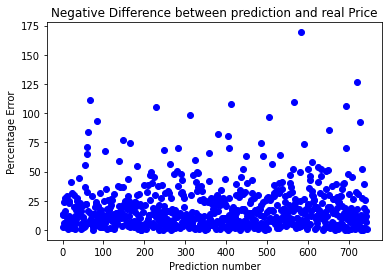

In [ ]:
plt.plot(x3, lista3, 'o', color='blue')
plt.title("Negative Difference between prediction and real Price")
plt.xlabel("Prediction number")
plt.ylabel("Percentage Error");

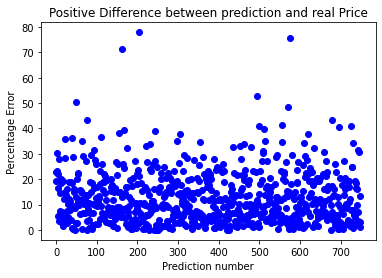

In [ ]:
plt.plot(x4, lista4, 'o', color='blue')
plt.title("Positive Difference between prediction and real Price")
plt.xlabel("Prediction number")
plt.ylabel("Percentage Error");

### **Luxury Cars**

####**Model used**

In [ ]:
model_lasso_lux = Lasso(alpha=0.01)
model_lasso_lux.fit(X_trainlux, y_trainlux['Price_log'])

Lasso(alpha=0.01)

####**Results**

In [ ]:
SS_score_lux = get_model_score_lux(model_lasso_lux)

R-square on training set :  0.6838581881328072
R-square on test set :  0.7437032589962019
RMSE on training set :  9.217909247242973
RMSE on test set :  8.12842938673851


####**Predicted Values**

In [ ]:
pred_test = model_lasso_lux.predict(X_testlux)
pred_test_ = np.exp(pred_test)

In [ ]:
print("R-square on test set : ",metrics.r2_score(y_testlux['Price'],pred_test_))
print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_testlux['Price'],pred_test_)))

R-square on test set :  0.7437032589962019
RMSE on test set :  8.12842938673851


In [ ]:
import numpy as np

In [ ]:
yy2=pred_test_
yy2 = np.array(yy2)
yy2


array([ 41.97600837,  28.75434019,   6.7537823 ,  13.41708189,
        38.83833405,  19.80772423,  12.83444349,  31.12906844,
        40.17840094,  54.54850148,  17.19311046,  24.25120631,
        26.60346219,  18.89173843,  45.06154313,  30.49011088,
        19.46982003,  15.2845743 ,  21.1894931 ,  22.21348907,
        27.55784365,  29.31307701,  15.63332406,   9.69026763,
        39.51311925,  30.24796069,  13.34513928,  13.99094696,
        14.53832098,  10.02659206,  32.71451866,  14.10756883,
        43.15621513,  17.37575682,  35.23837914,  38.52512426,
        20.34100994,  24.18806123,  51.23646527,  49.05413915,
        15.79098783,   4.42760613,  13.04279343,  14.30073881,
        23.53966995,  21.75377076,  26.68218804,  24.04054861,
         8.98494962,  21.96866406,  17.56198925,  30.24998673,
        21.50178866,  15.43722871,  42.42283631,  14.51286978,
        26.02328888,  47.09538575,  16.03601871,  25.26740958,
        13.95680517,  13.02595596,  25.11650425,  25.63

In [ ]:
yy=y_testlux['Price'].values
yy= np.array(yy)
yy

array([ 36.76,  38.72,   6.  ,   8.95,  28.  ,  15.  ,  12.5 ,  31.55,
        43.  ,  61.29,  19.5 ,  29.  ,  24.63,  14.35,  38.  ,  35.84,
        18.5 ,  11.5 ,  17.5 ,  19.9 ,  35.  ,  27.15,  11.5 ,   9.92,
        43.  ,  33.  ,   9.29,  10.5 ,  10.2 ,   8.5 ,  32.  ,   9.75,
        47.5 ,  17.  ,  24.5 ,  60.95,  30.  ,  16.11,  59.  ,  65.81,
        17.5 ,   5.5 ,   8.5 ,  13.5 ,  39.  ,  21.9 ,  19.9 ,  19.9 ,
         6.3 ,  28.  ,  21.26,  42.5 ,  19.5 ,  19.  ,  54.  ,  15.  ,
        35.5 ,  40.5 ,  10.75,  23.19,  10.95,  11.5 ,  26.  ,  16.58,
        29.95,  28.5 ,  48.22,  13.95,  28.03,   9.8 ,   7.56,  51.52,
        40.  ,  40.88,  45.52,  35.  ,  59.72,  25.5 ,  22.5 ,  23.  ,
        19.5 ,   8.75,  14.5 ,  21.  ,  11.  ,  27.  ,  16.  ,  20.87,
        23.  ,  24.37,  22.  ,  20.5 ,  75.  ,  45.  ,  36.64,  17.75,
        23.45,  15.21,  24.  ,  19.86,  20.  ,  14.5 ,  34.5 ,  26.5 ,
        79.  ,  52.54,  12.5 ,  16.85,  22.  ,  40.66,  24.75,  32.95,
      

In [ ]:
df = pd.DataFrame({'actual':yy, 'predicted':yy2})
df

,actual,predicted
0,36.76,41.976008
1,38.72,28.754340
2,6.00,6.753782
3,8.95,13.417082
4,28.00,38.838334
...,...,...
296,21.00,21.871795
297,25.70,24.443370
298,49.00,28.300251
299,22.50,29.599018


In [ ]:
df['Diferencia']=((df['actual']-df['predicted'])/df['actual'])*100
df

,actual,predicted,Diferencia,index1
0,36.76,41.976008,-14.189359,0
1,38.72,28.754340,25.737758,1
2,6.00,6.753782,-12.563038,2
3,8.95,13.417082,-49.911530,3
4,28.00,38.838334,-38.708336,4
...,...,...,...,...
296,21.00,21.871795,-4.151403,296
297,25.70,24.443370,4.889610,297
298,49.00,28.300251,42.244386,298
299,22.50,29.599018,-31.551191,299


In [ ]:
lista=[]
lista2=[]
for i in df['Diferencia']:
  if(i<0):
    lista.append(i)
  else:
    lista2.append(i)


In [ ]:
for i in  range(0,len(lista)):
  lista[i]=abs(lista[i])
lista

In [ ]:
x=range(0,len(lista))

In [ ]:
x2=range(0,len(lista2))
x2

range(0, 144)

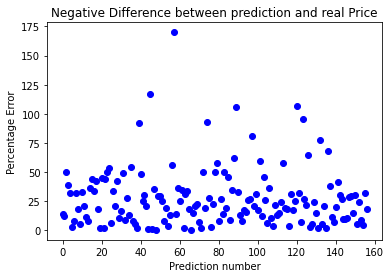

In [ ]:
plt.plot(x, lista, 'o', color='blue')
plt.title("Negative Difference between prediction and real Price")
plt.xlabel("Prediction number")
plt.ylabel("Percentage Error");

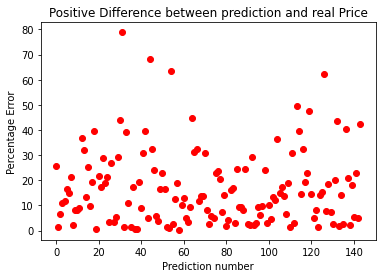

In [ ]:
plt.plot(x2, lista2, 'o', color='red')
plt.title("Positive Difference between prediction and real Price")
plt.xlabel("Prediction number")
plt.ylabel("Percentage Error");